In [4]:
import numpy as np
import numpy.random as r
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
import random
%matplotlib inline

In [5]:
#Loading the dataset
data = pd.read_csv("world-happiness-report-2021.csv")
data.dropna(axis=1)
data = shuffle(data)


In [6]:
#Setting up the data
df = data.values
X = df[:,6:20]
yOg = df[:,2]
#Convert Y to find if a country is happy or not, 
#Find the average happiness of countries
avgHappy = np.mean(yOg)
print(avgHappy)
Y = np.where(yOg < avgHappy, 0, 1)

5.532838926174494


In [7]:
#Resources used were HW#5 and Lecture Notes
#Setting up neccessary variables
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
#Creating a training set and testing test by pseduo-randomly assigning the sets
X_train = X[0:80]
Y_train = Y[0:80]
X_test = X[80:]
Y_test = Y[80:]

# Logistic Regression with Ridge Regularization

In [8]:
acc_train_logreg_ridge = []
acc_test_logreg_ridge = []
c_logreg_ridge = []

In [9]:
def logreg_model_ridge(c, X_train, Y_train, X_test, Y_test):
    logreg = linear_model.LogisticRegression(C = c,)
    logreg.fit(X_train,Y_train)
    Yhat_train = logreg.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg_ridge.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg.predict(X_test)
    
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg_ridge.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    c_logreg_ridge.append(c)

In [10]:
for c in cVals:
    logreg_model_ridge(c,X_train, Y_train, X_test, Y_test)

Accuracy on training data = 0.800000
Accuracy on test data = 0.768116
Accuracy on training data = 0.812500
Accuracy on test data = 0.840580
Accuracy on training data = 0.825000
Accuracy on test data = 0.826087
Accuracy on training data = 0.900000
Accuracy on test data = 0.826087
Accuracy on training data = 0.962500
Accuracy on test data = 0.913043
Accuracy on training data = 0.987500
Accuracy on test data = 0.971014


/Users/iqbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/iqbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

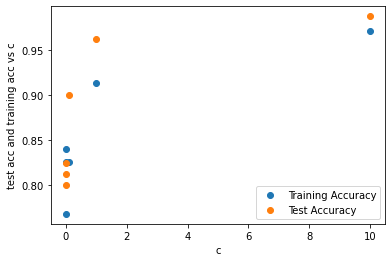

In [11]:
plt.grid()
plt.xlabel("c")
plt.ylabel("test acc and training acc vs c")
plt.scatter(c_logreg_ridge, acc_test_logreg_ridge)
plt.grid()
plt.scatter(c_logreg_ridge, acc_train_logreg_ridge)
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

# Logistic Regression with Lasso Regularization

In [12]:
#Logistic Regression with Lasso Regularization
acc_train_logreg_lasso = []
acc_test_logreg_lasso = []
c_logreg_lasso = []

In [13]:
def logreg_model_lasso(c, X_train, Y_train, X_test, Y_test):
    logreg = linear_model.LogisticRegression('l1',C = c,solver='saga')
    logreg.fit(X_train,Y_train)
    Yhat_train = logreg.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg_lasso.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg.predict(X_test)
    
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg_lasso.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    c_logreg_lasso.append(c)

In [14]:
for c in cVals:
    logreg_model_lasso(c,X_train, Y_train, X_test, Y_test)

Accuracy on training data = 0.512500
Accuracy on test data = 0.478261
Accuracy on training data = 0.512500
Accuracy on test data = 0.478261
Accuracy on training data = 0.550000
Accuracy on test data = 0.623188
Accuracy on training data = 0.487500
Accuracy on test data = 0.521739
Accuracy on training data = 0.775000
Accuracy on test data = 0.855072
Accuracy on training data = 0.812500
Accuracy on test data = 0.855072


/Users/iqbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/iqbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/iqbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/iqbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


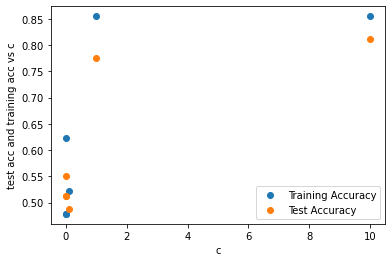

In [15]:
plt.grid()
plt.xlabel("c")
plt.ylabel("test acc and training acc vs c")
plt.scatter(c_logreg_lasso, acc_test_logreg_lasso)
plt.grid()
plt.scatter(c_logreg_lasso, acc_train_logreg_lasso)
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

# Logistic Regression with Polynomial Feature Transformation

Accuracy on training data = 0.962500
Accuracy on test data = 0.898551
Accuracy on training data = 0.975000
Accuracy on test data = 1.000000
Accuracy on training data = 0.975000
Accuracy on test data = 0.985507
Accuracy on training data = 1.000000
Accuracy on test data = 0.985507
Accuracy on training data = 1.000000
Accuracy on test data = 0.985507
Accuracy on training data = 1.000000
Accuracy on test data = 0.971014


/Users/iqbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/iqbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

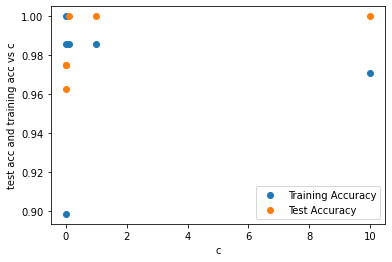

In [16]:
poly = PolynomialFeatures(2)
X_train_transformed = poly.fit_transform(X_train)
X_test_transformed = poly.fit_transform(X_test)
X_test_transformed.shape
acc_train_logreg_ridge = []
acc_test_logreg_ridge = []
c_logreg_ridge = []

for c in cVals:
    logreg_model_ridge(c, X_train_transformed, Y_train, X_test_transformed, Y_test)


plt.grid()
plt.xlabel("c")
plt.ylabel("test acc and training acc vs c")
plt.scatter(c_logreg_ridge, acc_test_logreg_ridge)
plt.grid()
plt.scatter(c_logreg_ridge, acc_train_logreg_ridge)
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')


# SVM with Linear Kernel

In [17]:
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []

In [18]:
def svm_linear(c):
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(X_train, Y_train)
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    c_svm_linear.append(c)


In [19]:
for c in cVals:
    svm_linear(c)

Train Accuracy = 0.512500
Test Accuracy = 0.478261
Train Accuracy = 0.837500
Test Accuracy = 0.840580
Train Accuracy = 0.837500
Test Accuracy = 0.840580
Train Accuracy = 0.950000
Test Accuracy = 0.884058
Train Accuracy = 0.962500
Test Accuracy = 0.985507
Train Accuracy = 0.987500
Test Accuracy = 0.985507


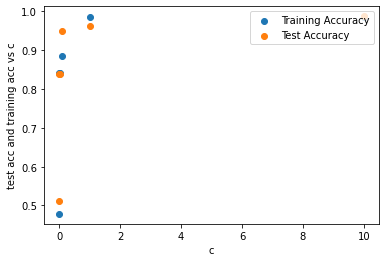

In [20]:
plt.grid()
plt.xlabel('c')
plt.ylabel('test acc and training acc vs c')
plt.scatter(c_svm_linear,acc_test_svm_linear)
plt.grid()
plt.scatter(c_svm_linear,acc_train_svm_linear)
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# SVM with RBF

In [23]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []

In [24]:
def svm_rbf(c):
    svc_linear = svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_linear.fit(X_train, Y_train)
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    acc_train_svm_rbf.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    acc_test_svm_rbf.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    c_svm_rbf.append(c)

In [25]:
for c in cVals:
    svm_rbf(c)

Train Accuracy = 0.512500
Test Accuracy = 0.478261
Train Accuracy = 0.512500
Test Accuracy = 0.478261
Train Accuracy = 0.512500
Test Accuracy = 0.478261
Train Accuracy = 0.512500
Test Accuracy = 0.478261
Train Accuracy = 0.800000
Test Accuracy = 0.840580
Train Accuracy = 0.812500
Test Accuracy = 0.840580


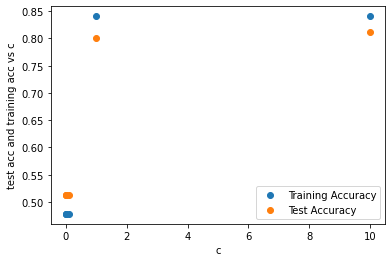

In [26]:
plt.grid()
plt.xlabel('c')
plt.ylabel('test acc and training acc vs c')
plt.scatter(c_svm_rbf,acc_test_svm_rbf)
plt.grid()
plt.scatter(c_svm_rbf,acc_train_svm_rbf)
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

# SVM with Polynomial

In [28]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []

In [30]:
def svm_polynomial(c):
    svm_polynomial = svm.SVC(probability = False, kernel = "poly", C=c)
    #Optional to change the training sets to make poly work faster
    svm_polynomial.fit(X_train,Y_train)
    Yhat_svm_train_poly = svm_polynomial.predict(X_train)
    acc_train = np.mean(Yhat_svm_train_poly == Y_train)
    acc_train_svm_poly.append(acc_train)
    print("Train Accuracy = {0:f}".format(acc_train))
    Yhat_svm_test_poly = svm_polynomial.predict(X_test)
    acc_test = np.mean(Yhat_svm_test_poly == Y_test)
    acc_test_svm_poly.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    c_svm_poly.append(c)

In [31]:
#Could take long
for c in cVals:
    svm_polynomial(c)

Train Accuracy = 0.512500
Test Accuracy = 0.478261
Train Accuracy = 0.512500
Test Accuracy = 0.478261
Train Accuracy = 0.512500
Test Accuracy = 0.478261
Train Accuracy = 0.825000
Test Accuracy = 0.826087
Train Accuracy = 0.825000
Test Accuracy = 0.811594
Train Accuracy = 0.825000
Test Accuracy = 0.826087


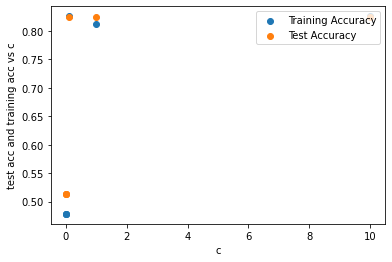

In [32]:
#Wait for above block to finish executing
plt.grid()
plt.xlabel('c')
plt.ylabel('test acc and training acc vs c')
plt.scatter(c_svm_poly,acc_test_svm_poly)
plt.grid()

plt.scatter(c_svm_poly,acc_train_svm_poly)
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Neural Network

In [33]:
X_scale = StandardScaler() 
X = X_scale.fit_transform(X)#scale to unit

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

In [34]:
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect

In [35]:
yv_train = convert_y_to_vect(y_train)
yv_test = convert_y_to_vect(y_test)

In [36]:
def f(z):
    return 1 / (1 + np.exp(-z))


def f_deriv(z):
    return f(z) * (1 - f(z))

In [37]:
def setup_and_init_weights(nn_structure):
    W = {} #creating a dictionary i.e. a set of key: value pairs
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1])) #Return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

In [38]:
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

In [39]:
def feed_forward(x, W, b):
    a = {1: x} # create a dictionary for holding the a values for all levels
    z = { } # create a dictionary for holding the z values for all the layers
    for l in range(1, len(W) + 1): # for each layer
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
        a[l+1] = f(z[l+1]) # a^(l+1) = f(z^(l+1))
    return a, z

In [40]:
def calculate_out_layer_delta(y, a_out, z_out):
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    return -(y-a_out) * f_deriv(z_out) 


def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

In [41]:
def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            a, z = feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))# np.newaxis increase the number of dimensions
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l])
            b[l] += -alpha * (1.0/N * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func


def predict_y(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    return y

In [42]:
nn_structure = [14, 28, 10]

W, b, avg_cost_func = train_nn(nn_structure, X_train, yv_train, 3000)

Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 1000 of 3000
Iteration 2000 of 3000


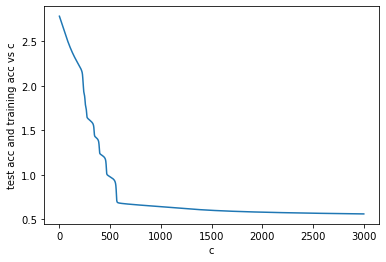

In [43]:
plt.plot(avg_cost_func)
plt.ylabel('test acc and training acc vs c')
plt.xlabel('c')
plt.show()

In [122]:
y_pred = predict_y(W, b, X_test, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

Prediction accuracy is 45.0%
